In [55]:
import numpy as np
import pandas as pd
from caits.dataset import CoreArray, DatasetArray

In [56]:
initial_data = pd.read_csv("data/AirQuality.csv", sep=';', decimal=",").iloc[:9357, 2:-2]
print(initial_data.head())

   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  


In [57]:
print(initial_data)

      CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0        2.6       1360.0     150.0      11.9         1046.0    166.0   
1        2.0       1292.0     112.0       9.4          955.0    103.0   
2        2.2       1402.0      88.0       9.0          939.0    131.0   
3        2.2       1376.0      80.0       9.2          948.0    172.0   
4        1.6       1272.0      51.0       6.5          836.0    131.0   
...      ...          ...       ...       ...            ...      ...   
9352     3.1       1314.0    -200.0      13.5         1101.0    472.0   
9353     2.4       1163.0    -200.0      11.4         1027.0    353.0   
9354     2.4       1142.0    -200.0      12.4         1063.0    293.0   
9355     2.1       1003.0    -200.0       9.5          961.0    235.0   
9356     2.2       1071.0    -200.0      11.9         1047.0    265.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0           1056.0    113.0        1692.0     

In [58]:
data = DatasetArray(
    CoreArray(initial_data.values, {"axis_1": initial_data.columns}),
)

print(data)

DatasetArray object with 9357 instances.


In [59]:
from caits.transformers import SklearnWrapper
from sklearn.preprocessing import MinMaxScaler

scaler = SklearnWrapper(MinMaxScaler, {"feature_range": (-1, 1)})

scaled_data = scaler.fit_transform(data)
scaled_data


DatasetArray object with 9357 instances.

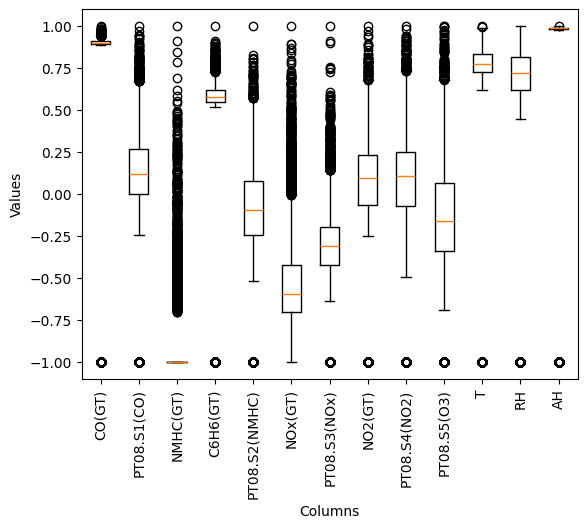

In [60]:
import matplotlib.pyplot as plt

plt.boxplot(scaled_data.X.values, tick_labels=data.X.keys()["axis_1"])
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

In [61]:
from matplotlib.cbook import boxplot_stats

print(pd.DataFrame(boxplot_stats(data.X.values, whis=1.5), index=data.X.keys()["axis_1"]))

                      mean       iqr         cilo         cihi     whishi  \
CO(GT)          -34.207524    2.0000     1.467539     1.532461     5.6000   
PT08.S1(CO)    1048.990061  300.0000  1048.130856  1057.869144  1669.0000   
NMHC(GT)       -159.090093    0.0000  -200.000000  -200.000000  -200.0000   
C6H6(GT)          1.865683    9.6000     7.744187     8.055813    28.0000   
PT08.S2(NMHC)   894.595276  394.0000   888.605191   901.394809  1696.0000   
NOx(GT)         168.616971  234.0000   137.202068   144.797932   635.0000   
PT08.S3(NOx)    794.990168  323.0000   788.757555   799.242445  1442.0000   
NO2(GT)          58.148873   80.0000    94.701562    97.298438   253.0000   
PT08.S4(NO2)   1391.479641  477.0000  1438.258062  1453.741938  2376.0000   
PT08.S5(O3)     975.072032  555.0000   932.992084   951.007916  2087.0000   
T                 9.778305   13.2000    16.985758    17.414242    43.4000   
RH               39.485380   27.8000    48.148793    49.051207    88.7000   

In [62]:
valid_data = pd.DataFrame(data.X.values, columns=data.X.keys()["axis_1"]).drop(columns=["NMHC(GT)"])
valid_data = valid_data.replace(-200, 0)
print(valid_data.head())

   CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6       1360.0      11.9         1046.0    166.0        1056.0   
1     2.0       1292.0       9.4          955.0    103.0        1174.0   
2     2.2       1402.0       9.0          939.0    131.0        1140.0   
3     2.2       1376.0       9.2          948.0    172.0        1092.0   
4     1.6       1272.0       6.5          836.0    131.0        1205.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1     92.0        1559.0        972.0  13.3  47.7  0.7255  
2    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4    116.0        1490.0       1110.0  11.2  59.6  0.7888  


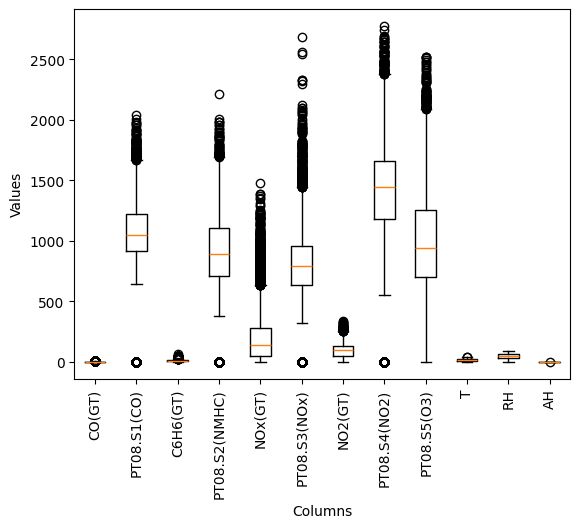

In [63]:
plt.boxplot(valid_data.values, tick_labels=valid_data.columns)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()


In [64]:
print(pd.DataFrame(boxplot_stats(valid_data.values, whis=1.5), index=valid_data.columns))


                      mean       iqr         cilo         cihi     whishi  \
CO(GT)            1.765545    2.0000     1.467539     1.532461     5.6000   
PT08.S1(CO)    1056.813081  300.0000  1048.130856  1057.869144  1669.0000   
C6H6(GT)          9.688704    9.6000     7.744187     8.055813    28.0000   
PT08.S2(NMHC)   902.418296  394.0000   888.605191   901.394809  1696.0000   
NOx(GT)         203.649567  234.0000   137.202068   144.797932   635.0000   
PT08.S3(NOx)    802.813188  323.0000   788.757555   799.242445  1442.0000   
NO2(GT)          93.245592   80.0000    94.701562    97.298438   253.0000   
PT08.S4(NO2)   1399.302661  477.0000  1438.258062  1453.741938  2376.0000   
PT08.S5(O3)     982.895052  555.0000   932.992084   951.007916  2087.0000   
T                17.601325   13.2000    16.985758    17.414242    43.4000   
RH               47.308400   27.8000    48.148793    49.051207    88.7000   
AH                0.985417    0.6039     0.966998     0.986602     2.1806   

In [65]:
preprocessed_data = DatasetArray(CoreArray(valid_data.values, axis_names={"axis_1": valid_data.columns}))
print(preprocessed_data)


DatasetArray object with 9357 instances.


In [66]:
train, test = preprocessed_data.train_test_split(test_size=0.2, random_state=42)
train

DatasetArray object with 7485 instances.

In [67]:
test

DatasetArray object with 1872 instances.

In [68]:
from sklearn.preprocessing import StandardScaler

scaled = SklearnWrapper(StandardScaler)
train_scaled = scaled.fit_transform(train)
test_scaled = scaled.transform(test)
train_scaled

DatasetArray object with 7485 instances.

In [69]:
test_scaled

DatasetArray object with 1872 instances.

In [70]:
train_scaled_data_df = pd.DataFrame(train_scaled.X.values, columns=train.X.keys()["axis_1"])
print(train_scaled_data_df)

        CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
0    -0.308465    -0.410877 -0.437039      -0.225841 -0.464347      0.291236   
1    -1.141201    -0.539596 -0.634248      -0.444510 -0.784085      0.204208   
2     0.524272     0.556164  0.641036       0.733176  0.471698      0.204208   
3     0.844555     0.143604  0.627889       0.720680  1.027765     -0.394950   
4    -0.308465    -0.301961 -0.634248      -0.447634  0.448529      0.254417   
...        ...          ...       ...            ...       ...           ...   
7480  1.485121     1.255867  1.140632       1.086169  1.806258     -1.107915   
7481  0.075875    -0.559399  0.154588       0.330201  0.624616      0.217597   
7482 -0.372521    -0.117134 -0.739426      -0.588206 -0.061199      0.016762   
7483  0.524272     0.229416 -0.068916       0.139647  1.027765     -0.328005   
7484 -1.141201    -0.463685 -0.923487      -0.838113 -0.862861      0.686212   

       NO2(GT)  PT08.S4(NO2)  PT08.S5(O

In [93]:
from caits.eda import get_high_corr_features

corr_feats = get_high_corr_features(train_scaled_data_df, threshold=0.8)

train_corr_data = train_scaled_data_df[corr_feats]
print(train_corr_data)

      PT08.S2(NMHC)   NOx(GT)  PT08.S4(NO2)  PT08.S5(O3)
0         -0.225841 -0.464347      0.259525    -0.622610
1         -0.444510 -0.784085      0.236965    -0.490966
2          0.733176  0.471698      0.185078     0.986626
3          0.720680  1.027765     -0.261605     0.673404
4         -0.447634  0.448529     -1.148204    -0.100573
...             ...       ...           ...          ...
7480       1.086169  1.806258      0.437747     1.447381
7481       0.330201  0.624616     -1.042173    -0.025672
7482      -0.588206 -0.061199     -0.891022    -0.347973
7483       0.139647  1.027765     -0.475923     0.743766
7484      -0.838113 -0.862861      0.049719    -0.584024

[7485 rows x 4 columns]


In [94]:
X_train = train_corr_data.iloc[:, :-1]
y_train = train_corr_data.iloc[:, [-1]]



In [95]:
test_scaled = DatasetArray(CoreArray(test_scaled.X.values, axis_names={"axis_1": valid_data.columns}))

test = test_scaled.X.loc[:, corr_feats].values
X_test = test[:, :-1]
y_test = test[:, [-1]]


In [96]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7485, 3)
(7485, 1)
(1872, 3)
(1872, 1)


In [97]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [98]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(y_test, predictions))
print("R2:", r2_score(y_test, predictions))

MSE:  0.14228922448206524
R2: 0.8490347717278822
